In [88]:
import pandas as pd
import numpy as np

# Modelling 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay, f1_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualization
from sklearn.tree import export_graphviz
from IPython.display import Image
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Load Data

In [89]:
currentDirectory = f"{Path.cwd()}"
df = pd.read_csv(f"{currentDirectory}/Data/trainV4.csv")

In [90]:
x = df.iloc[:,0 :42]
y = df.iloc[:,42]

In [91]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

# Random Forest

In [92]:
rf = RandomForestClassifier()
rf.fit(xTrain, yTrain)

RandomForestClassifier()

### Testing
- Accuracy
- Confusion Matrix

In [93]:
yPred = rf.predict(xTest)
accuracy = accuracy_score(yTest, yPred)
print("Accuracy: ", accuracy)

Accuracy:  0.9986666666666667


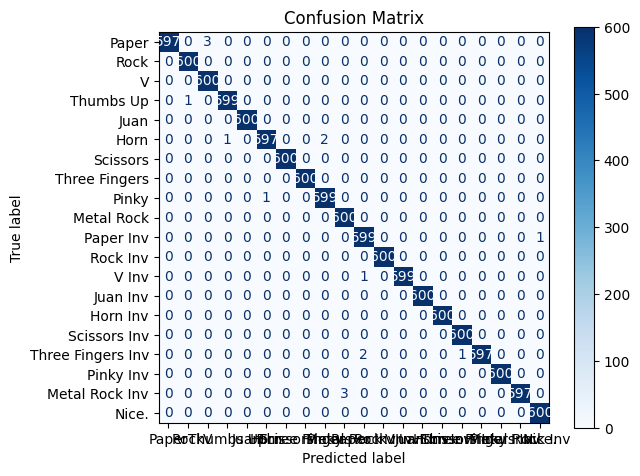

In [94]:
labels = [
  'Paper', 
  'Rock', 
  'V', 
  'Thumbs Up', 
  'Juan',
  'Horn',
	'Scissors',
  'Three Fingers',
  'Pinky',
  'Metal Rock',
  'Paper Inv',
  'Rock Inv',
  'V Inv',
  'Juan Inv',
  'Horn Inv',
  'Scissors Inv',
  'Three Fingers Inv',
  'Pinky Inv',
  'Metal Rock Inv',
  'Nice.'
  ]

cm = confusion_matrix(yTest, yPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix')
plt.show()

### Save to Computer

In [95]:
from joblib import dump, load
dump(rf, 'RandomForest_4.joblib')

['RandomForest_4.joblib']

# KNN Model

In [74]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [96]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(xTrain)
X_test_scaled = scaler.transform(xTest)

In [97]:
knnModel = KNeighborsClassifier(n_neighbors=3)
knnModel.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=3)

In [98]:
y_pred = knnModel.predict(xTest)
accuracy = accuracy_score(yTest, y_pred)
precissionScore = precision_score(yTest, yPred, average='macro')
recallScore = recall_score(yTest, yPred, average='macro')
f1Score = f1_score(yTest, yPred, average='macro')
print(f"Model Accuracy: {accuracy}")
print(f"Precission Accuracy: {precissionScore}")
print(f"Recall Score: {recallScore}")
print(f"F1 Score: {f1Score}")

Model Accuracy: 0.9989166666666667
Precission Accuracy: 0.998670399375802
Recall Score: 0.9986666666666668
F1 Score: 0.9986665227411959


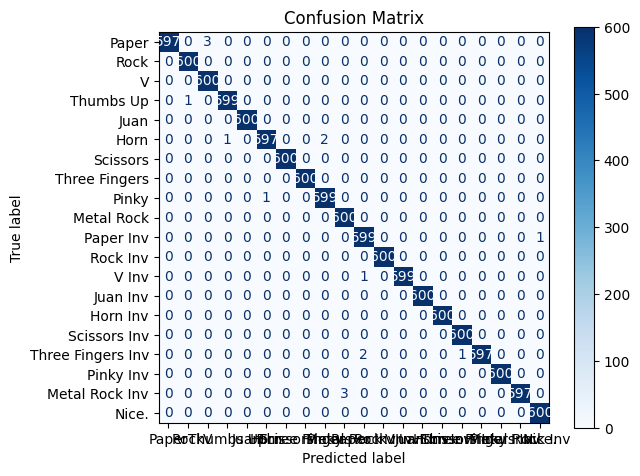

In [ ]:
labels = [
  'Paper', 
  'Rock', 
  'V', 
  'Thumbs Up', 
  'Juan',
  'Horn',
	'Scissors',
  'Three Fingers',
  'Pinky',
  'Metal Rock',
  'Paper Inv',
  'Rock Inv',
  'V Inv',
  'Juan Inv',
  'Horn Inv',
  'Scissors Inv',
  'Three Fingers Inv',
  'Pinky Inv',
  'Metal Rock Inv',
  'Nice.'
]

cm = confusion_matrix(yTest, yPred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix')
plt.show()

### Save to Computer

In [101]:
dump(knnModel, 'KnnModel_4.joblib')

['KnnModel_4.joblib']